<a href="https://colab.research.google.com/github/ManueloRZ2/MiniProyecto/blob/master/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering algorithms on toy datasets

**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


In this LAB we will show characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.


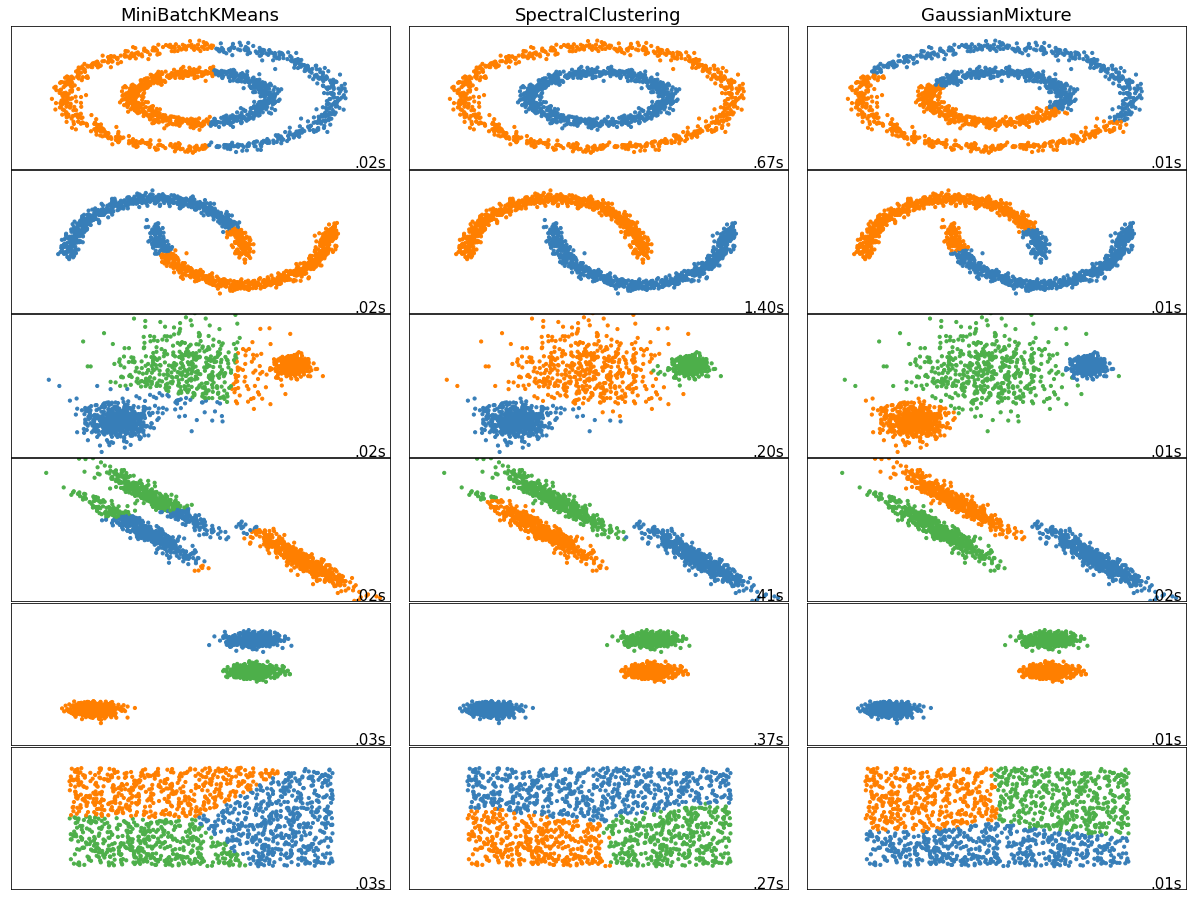

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(7 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    
    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('SpectralClustering', spectral),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Learning Assignments:

The main idea of this LAB is to provide you the key aspects of a given clustering task. To this end, you are invited to change all the model parameters for each Clustering Method. Please respond:

1. ¿Can you notice any change in the models performance?
2. ¿What are in your opinion, the parameters that exhibit better performances for each clustering method?
3. ¿What is your opinion for the complexity time for each method?
4. Please change the $n\_samples$ variable size for diferent sets (small, normal and large). ¿How is the resulting clustering performance for each method?
5. Plot the best 3 models configuration that in your opinion perfomrs the best.

CONCLUSIONES:

**1.** Inicialmente al comparar los métodos de clustering sin variar los parámetros, ningún método da los mejores reultados para todas las gráficas, ya que el modelo speltralClustering logra hacer una perfecta división de los circulos y la slunas, algo que los otros dos métodos no obtiene, pero en las últimas cuatro figuras el método que arroja un mejor resultado comparado con lo demás es el GaussianMixture, porque logra hacer un mejor agrupamiento a medida que los datos están más concentrados y no están más dispersos. Al comparar los costos computacionales, el método más adecuado es el GaussianMixture ya que es el que obtiene un menor tiempo comparado con los otros modelos, con el modelo SpectralClustering los costos computacionales son muy altos, esto se debe a que esta función en vez de trabajar los datos agrupados en un solo grupo, lo que hace es particionarlo en varios grupos.

**2.** Para todos los métodos es muy importante el número de muestras que se tomen ya que de estas va a depender el error. Para el método SpectralClustering es muy importante el factor de ruido, ya que si se le aumenta el valor no hace una buena división de los circulos y las lunas y queda igual a los otros dos métodos. Para el modelo GaussianMixture es muy importante el typo de covarianza, ya que de esto depende si hace un buen agrupamiento de los datos y se obtengan menor número de errores, al variar los tipos de varianza se llegó a la conclusión que con la que se obtienen mejores resultados es con el tipo full. Para el método MiniBatchKmeans es muy importante el número de clustering y donde se tomen los centroides, ya que de esto va a depender si el algoritmo obtiene un buen desempeño frente a los errores.

**3.** A la hora de implementar un algoritmo, se tiene que tener presente que se quiere priorizar si el costo computacional o el número de errores, este es el cado de estos métodos de clustering, ya que con el método de GussianMixture se obtiene el menor tiempo de todos, pero las dos primeras gráficas no logra hacer la división correcta de circulos y de lunas, en el método SpectralClustering se obtienen un muy buena división de circulos y de lunas, pero a cambio de un alto costo computacional y con las demás gráfica los resultados no son muy buenos. Con el primer método de MiniBatchKmeans, los tiempos no son muy altos pero los resultados no son muy favorables,ya que a simple vista son muy visibles los errores. En conclusión el método con el que se obtienen mejores resultados, es con GussianClustering, ya que de 6 se obtienen 4 gráficas con menor número de error y tiempo computacional comparados con los demás métodos.

**4.** El número de muestras está muy asociado al número de errores, ya que entre más grande sea el número de muestras, se van a obtener más errores y también el algoritmo se va a tardar más tiempo en compilar, si por el contrario se ingresa un número de muestras pequeño, los datos van a estar menos concentrados y más dispersos, por lo tanto el número de errores va a ser menor, estos ocurre en los tres métodos de Clustering, pero el comportamiento de los tres métodos sigue arrojando los mismos resultados frente al costo computacional, división de circulos y lunas, y número de errores, como se mencionaba anteriormente para cada uno de los métodos.

